17BCE0203 Sarthak Dandotiya

### Assignment 4

#### Question 1
Write a program to show the implementation of agglomerative hierarchical clustering
considering the below mentioned TF-IDF dataset. Display the result considering
single, complete and average linkage and prepare the dendrogram. (Consider
Euclidean distance as measure.)

<img src="A4Q1.png" style="width: 40%; margin-left: 25%"/>

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage
import math
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
distance=[]
d=[(1.1,11.6,13.1),(1.6,10.8,20.5),(2.3,10.6,12.0),(1.1,7.8,18.8),(2.2,12.9,13.2),(2.9,12.7,10.1)]
for i in range(len(d)):
    for j in range(len(d)):
        distance.append(math.sqrt(sum([(a-b)**2 for a,b in zip(d[i],d[j])])))
print(distance)
B=np.reshape(distance,(-1,6))
print(B)
def hierarchical_clustering(link): 
    initial_distances =B.copy()
    np.fill_diagonal(initial_distances,sys.maxsize)
    clusters = find_clusters(initial_distances,linkage)
    linked = linkage(d, link)

    labelList = range(0, 6)

    plt.figure(figsize=(10, 7))
    dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
    plt.show()
    return clusters
    
def find_clusters(input,link):
    clusters = {}
    row_index = -1
    col_index = -1
    array = []
    

    for n in range(input.shape[0]):
        array.append(n)
        
    clusters[0] = array.copy()

    #finding minimum value from the distance matrix
    for k in range(1, input.shape[0]):
        min_val = sys.maxsize
        
        for i in range(0, input.shape[0]):
            for j in range(0, input.shape[1]):
                if(input[i][j]<=min_val):
                    min_val = input[i][j]
                    row_index = i
                    col_index = j
                    
      
        #updating the matrix by calculating the new distances from the cluster to all points
        
        #for Single Link
        if(link== "single" ):
            for i in range(0,input.shape[0]):
                if(i != col_index):
                    #we calculate the distance of every data point from newly formed cluster and update the matrix.
                    temp = min(input[col_index][i],input[row_index][i])
                    #we update the matrix symmetrically as our distance matrix should always be symmetric
                    input[col_index][i] = temp
                    input[i][col_index] = temp
            
                
        #for Complete Link
        elif(link== "complete"):
             for i in range(0,input.shape[0]):
                if(i != col_index and i!=row_index):
                    temp = max(input[col_index][i],input[row_index][i])
                    input[col_index][i] = temp
                    input[i][col_index] = temp
            
        #for Average Link
        elif(link== "average"):
             for i in range(0,input.shape[0]):
                if(i != col_index and i!=row_index):
                    temp = (input[col_index][i]+input[row_index][i])/2
                    input[col_index][i] = temp
                    input[i][col_index] = temp
        
        
        #updating the rows and columns for the cluster with higher index i.e. the row index to infinity
        for i in range (0,input.shape[0]):
            input[row_index][i] = sys.maxsize
            input[i][row_index] = sys.maxsize
    
       
        minimum = min(row_index,col_index)
        maximum = max(row_index,col_index)
        for n in range(len(array)):
            if(array[n]==maximum):
                array[n] = minimum
        clusters[k] = array.copy()
        
    return clusters


[0.0, 7.459892760623306, 1.9104973174542796, 6.85054742338158, 1.7058722109231987, 3.6674241641784495, 7.459892760623306, 0.0, 8.531119504496465, 3.4842502780368694, 7.619711280619496, 10.651760417883985, 1.9104973174542796, 8.531119504496465, 0.0, 7.451174404078864, 2.5961509971494343, 2.8948229652260253, 6.85054742338158, 3.4842502780368694, 7.451174404078864, 0.0, 7.653757247260984, 10.145935146648632, 1.7058722109231987, 7.619711280619496, 2.5961509971494343, 7.653757247260984, 0.0, 3.184336665618131, 3.6674241641784495, 10.651760417883985, 2.8948229652260253, 10.145935146648632, 3.184336665618131, 0.0]
[[ 0.          7.45989276  1.91049732  6.85054742  1.70587221  3.66742416]
 [ 7.45989276  0.          8.5311195   3.48425028  7.61971128 10.65176042]
 [ 1.91049732  8.5311195   0.          7.4511744   2.596151    2.89482297]
 [ 6.85054742  3.48425028  7.4511744   0.          7.65375725 10.14593515]
 [ 1.70587221  7.61971128  2.596151    7.65375725  0.          3.18433667]
 [ 3.66742

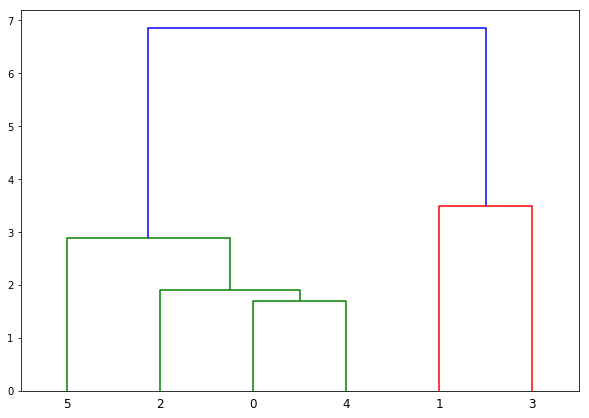

{0: [0, 1, 2, 3, 4, 5],
 1: [0, 1, 2, 3, 0, 5],
 2: [0, 1, 0, 3, 0, 5],
 3: [0, 1, 0, 1, 0, 5],
 4: [0, 1, 0, 1, 0, 0],
 5: [0, 0, 0, 0, 0, 0]}

In [8]:
hierarchical_clustering("single")

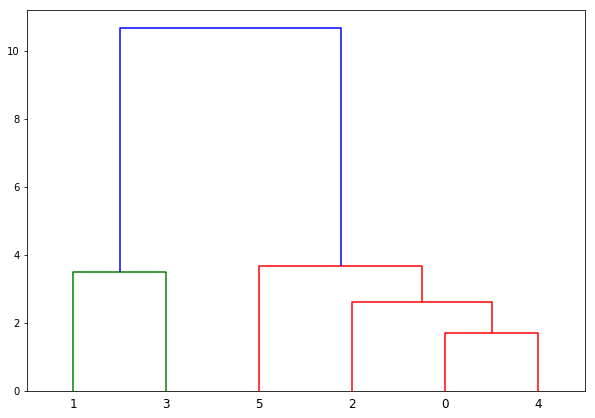

{0: [0, 1, 2, 3, 4, 5],
 1: [0, 1, 2, 3, 0, 5],
 2: [0, 1, 0, 3, 0, 5],
 3: [0, 1, 0, 1, 0, 5],
 4: [0, 1, 0, 1, 0, 0],
 5: [0, 0, 0, 0, 0, 0]}

In [17]:
hierarchical_clustering("complete")

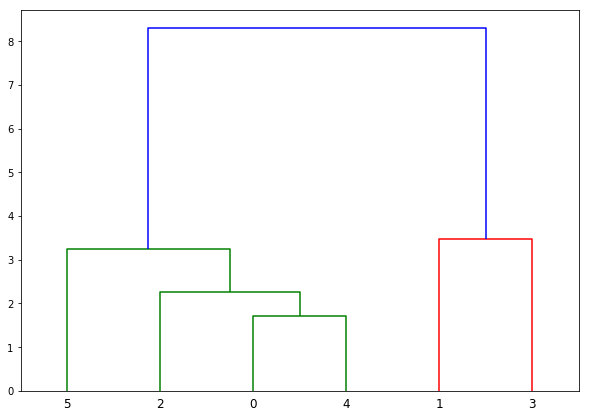

{0: [0, 1, 2, 3, 4, 5],
 1: [0, 1, 2, 3, 0, 5],
 2: [0, 1, 0, 3, 0, 5],
 3: [0, 1, 0, 1, 0, 5],
 4: [0, 1, 0, 1, 0, 0],
 5: [0, 0, 0, 0, 0, 0]}

In [9]:
hierarchical_clustering("average")

#### Question 2
Write a program to show the implementation of apriori algorithm using web log usage
data for web usage mining purpose. (Consider any publicly available web log data to
show the implementation.

In [10]:
import itertools
def generateC1(dataSet):
    productDict = {}
    returneSet = []
    for data in dataSet:
        for product in data:
            if product not in productDict:
               productDict[product] = 1
            else:
                 productDict[product] = productDict[product] + 1
    for key in productDict:
        tempArray = []
        tempArray.append(key)
        returneSet.append(tempArray)
        returneSet.append(productDict[key])
        tempArray = []
    return returneSet
def generateFrequentItemSet(CandidateList, noOfTransactions, minimumSupport, dataSet, fatherFrequentArray):
    frequentItemsArray = []
    for i in range(len(CandidateList)):
        if i%2 != 0:
            support = (CandidateList[i] * 1.0 / noOfTransactions) * 100
            if support >= minimumSupport:
                frequentItemsArray.append(CandidateList[i-1])
                frequentItemsArray.append(CandidateList[i])
            else:
                eleminatedItemsArray.append(CandidateList[i-1])

    for k in frequentItemsArray:
        fatherFrequentArray.append(k)

    if len(frequentItemsArray) == 2 or len(frequentItemsArray) == 0:
        #print("This will be returned")
        returnArray = fatherFrequentArray
        return returnArray

    else:
        generateCandidateSets(dataSet, eleminatedItemsArray, frequentItemsArray, noOfTransactions, minimumSupport)

def generateCandidateSets(dataSet, eleminatedItemsArray, frequentItemsArray, noOfTransactions, minimumSupport):
    onlyElements = []
    arrayAfterCombinations = []
    candidateSetArray = []
    for i in range(len(frequentItemsArray)):
        if i%2 == 0:
            onlyElements.append(frequentItemsArray[i])
    for item in onlyElements:
        tempCombinationArray = []
        k = onlyElements.index(item)
        for i in range(k + 1, len(onlyElements)):
            for j in item:
                if j not in tempCombinationArray:
                    tempCombinationArray.append(j)
            for m in onlyElements[i]:
                if m not in tempCombinationArray:
                    tempCombinationArray.append(m)
            arrayAfterCombinations.append(tempCombinationArray)
            tempCombinationArray = []
    sortedCombinationArray = []
    uniqueCombinationArray = []
    for i in arrayAfterCombinations:
        sortedCombinationArray.append(sorted(i))
    for i in sortedCombinationArray:
        if i not in uniqueCombinationArray:
            uniqueCombinationArray.append(i)
    arrayAfterCombinations = uniqueCombinationArray
    for item in arrayAfterCombinations:
        count = 0
        for transaction in dataSet:
            if set(item).issubset(set(transaction)):
                count = count + 1
        if count != 0:
            candidateSetArray.append(item)
            candidateSetArray.append(count)
    generateFrequentItemSet(candidateSetArray, noOfTransactions, minimumSupport, dataSet, fatherFrequentArray)

def generateAssociationRule(freqSet):
    associationRule = []
    for item in freqSet:
        if isinstance(item, list):
            if len(item) != 0:
                length = len(item) - 1
                while length > 0:
                    combinations = list(itertools.combinations(item, length))
                    temp = []
                    LHS = []
                    for RHS in combinations:
                        LHS = set(item) - set(RHS)
                        temp.append(list(LHS))
                        temp.append(list(RHS))
                        #print(temp)
                        associationRule.append(temp)
                        temp = []
                    length = length - 1
    return associationRule
def aprioriOutput(rules, dataSet, minimumSupport, minimumConfidence):
    returnAprioriOutput = []
    for rule in rules:
        supportOfX = 0
        supportOfXinPercentage = 0
        supportOfXandY = 0
        supportOfXandYinPercentage = 0
        for transaction in dataSet:
            if set(rule[0]).issubset(set(transaction)):
                supportOfX = supportOfX + 1
            if set(rule[0] + rule[1]).issubset(set(transaction)):
                supportOfXandY = supportOfXandY + 1
        supportOfXinPercentage = (supportOfX * 1.0 / noOfTransactions) * 100
        supportOfXandYinPercentage = (supportOfXandY * 1.0 / noOfTransactions) * 100
        confidence = (supportOfXandYinPercentage / supportOfXinPercentage) * 100
        if confidence >= minimumConfidence:
            supportOfXAppendString = "Support Of X: " + str(round(supportOfXinPercentage, 2))
            supportOfXandYAppendString = "Support of X & Y: " + str(round(supportOfXandYinPercentage))
            confidenceAppendString = "Confidence: " + str(round(confidence))

            returnAprioriOutput.append(supportOfXAppendString)
            returnAprioriOutput.append(supportOfXandYAppendString)
            returnAprioriOutput.append(confidenceAppendString)
            returnAprioriOutput.append(rule)

    return returnAprioriOutput

fileName = "automobile.txt"
minimumSupport = input('Enter minimum Support: ')
minimumConfidence = input('Enter minimum Confidence: ')
print("\n") 


minimumSupport = int(minimumSupport)
minimumConfidence = int(minimumConfidence)

nonFrequentSets = []
allFrequentItemSets = []
tempFrequentItemSets = []
dataSet = []
eleminatedItemsArray = []
noOfTransactions = 0
fatherFrequentArray = []
something = 0


#   Reading the data file line by line
with open(fileName,'r') as fp:
    lines = fp.readlines()

for line in lines:
    line = line.rstrip()
    dataSet.append(line.split(","))

noOfTransactions = len(dataSet)

firstCandidateSet = generateC1(dataSet)

frequentItemSet = generateFrequentItemSet(firstCandidateSet, noOfTransactions, minimumSupport, dataSet, fatherFrequentArray)

associationRules = generateAssociationRule(fatherFrequentArray)

AprioriOutput = aprioriOutput(associationRules, dataSet, minimumSupport, minimumConfidence)


counter = 1
if len(AprioriOutput) == 0:
    print("There are no association rules for this support and confidence.")
else:
    for i in AprioriOutput:
        if counter == 4:
            print(str(i[0]) + "------>" + str(i[1]))
            counter = 0
        else:
            print(i, end='  ')
        counter = counter + 1

Enter minimum Support: 11
Enter minimum Confidence: 9


Support Of X: 64.0  Support of X & Y: 52  Confidence: 81  ['Tires']------>['SideLight']
Support Of X: 72.0  Support of X & Y: 52  Confidence: 72  ['SideLight']------>['Tires']
Support Of X: 72.0  Support of X & Y: 68  Confidence: 94  ['SideLight']------>['HeadLight']
Support Of X: 88.0  Support of X & Y: 68  Confidence: 77  ['HeadLight']------>['SideLight']
Support Of X: 84.0  Support of X & Y: 56  Confidence: 67  ['WindShield']------>['SideLight']
Support Of X: 72.0  Support of X & Y: 56  Confidence: 78  ['SideLight']------>['WindShield']
Support Of X: 72.0  Support of X & Y: 52  Confidence: 72  ['SideLight']------>['Engine']
Support Of X: 68.0  Support of X & Y: 52  Confidence: 76  ['Engine']------>['SideLight']
Support Of X: 72.0  Support of X & Y: 48  Confidence: 67  ['SideLight']------>['Car']
Support Of X: 64.0  Support of X & Y: 48  Confidence: 75  ['Car']------>['SideLight']
Support Of X: 72.0  Support of X & Y: 36  Confid

Support Of X: 56.0  Support of X & Y: 28  Confidence: 50  ['Oil', 'HeadLight']------>['SideLight', 'SteeringWheel']
Support Of X: 28.0  Support of X & Y: 28  Confidence: 100  ['SteeringWheel', 'Oil', 'SideLight']------>['HeadLight']
Support Of X: 32.0  Support of X & Y: 28  Confidence: 88  ['SteeringWheel', 'HeadLight', 'SideLight']------>['Oil']
Support Of X: 36.0  Support of X & Y: 28  Confidence: 78  ['SteeringWheel', 'Oil', 'HeadLight']------>['SideLight']
Support Of X: 48.0  Support of X & Y: 28  Confidence: 58  ['Oil', 'HeadLight', 'SideLight']------>['SteeringWheel']
Support Of X: 84.0  Support of X & Y: 36  Confidence: 43  ['WindShield']------>['Engine', 'SideLight']
Support Of X: 72.0  Support of X & Y: 36  Confidence: 50  ['SideLight']------>['Engine', 'WindShield']
Support Of X: 68.0  Support of X & Y: 36  Confidence: 53  ['Engine']------>['SideLight', 'WindShield']
Support Of X: 56.0  Support of X & Y: 36  Confidence: 64  ['WindShield', 'SideLight']------>['Engine']
Support

Support Of X: 60.0  Support of X & Y: 32  Confidence: 53  ['HeadLight', 'Tires']------>['Wheels']
Support Of X: 64.0  Support of X & Y: 32  Confidence: 50  ['Tires']------>['HeadLight', 'Oil']
Support Of X: 64.0  Support of X & Y: 32  Confidence: 50  ['Oil']------>['HeadLight', 'Tires']
Support Of X: 88.0  Support of X & Y: 32  Confidence: 36  ['HeadLight']------>['Oil', 'Tires']
Support Of X: 36.0  Support of X & Y: 32  Confidence: 89  ['Oil', 'Tires']------>['HeadLight']
Support Of X: 60.0  Support of X & Y: 32  Confidence: 53  ['HeadLight', 'Tires']------>['Oil']
Support Of X: 56.0  Support of X & Y: 32  Confidence: 57  ['Oil', 'HeadLight']------>['Tires']
Support Of X: 64.0  Support of X & Y: 32  Confidence: 50  ['Tires']------>['HeadLight', 'SteeringWheel']
Support Of X: 48.0  Support of X & Y: 32  Confidence: 67  ['SteeringWheel']------>['HeadLight', 'Tires']
Support Of X: 88.0  Support of X & Y: 32  Confidence: 36  ['HeadLight']------>['SteeringWheel', 'Tires']
Support Of X: 32.

Support Of X: 52.0  Support of X & Y: 28  Confidence: 54  ['Oil', 'WindShield']------>['Engine', 'HeadLight']
Support Of X: 72.0  Support of X & Y: 28  Confidence: 39  ['WindShield', 'HeadLight']------>['Engine', 'Oil']
Support Of X: 56.0  Support of X & Y: 28  Confidence: 50  ['Oil', 'HeadLight']------>['Engine', 'WindShield']
Support Of X: 52.0  Support of X & Y: 28  Confidence: 54  ['WindShield', 'Engine']------>['HeadLight', 'Oil']
Support Of X: 44.0  Support of X & Y: 28  Confidence: 64  ['Oil', 'Engine']------>['HeadLight', 'WindShield']
Support Of X: 60.0  Support of X & Y: 28  Confidence: 47  ['Engine', 'HeadLight']------>['Oil', 'WindShield']
Support Of X: 44.0  Support of X & Y: 28  Confidence: 64  ['Oil', 'WindShield', 'HeadLight']------>['Engine']
Support Of X: 32.0  Support of X & Y: 28  Confidence: 88  ['Oil', 'WindShield', 'Engine']------>['HeadLight']
Support Of X: 44.0  Support of X & Y: 28  Confidence: 64  ['WindShield', 'HeadLight', 'Engine']------>['Oil']
Support Of

Support Of X: 36.0  Support of X & Y: 28  Confidence: 78  ['SteeringWheel', 'Oil']------>['WindShield']
Support Of X: 68.0  Support of X & Y: 24  Confidence: 35  ['Wheels']------>['Car', 'Engine']
Support Of X: 68.0  Support of X & Y: 24  Confidence: 35  ['Engine']------>['Car', 'Wheels']
Support Of X: 64.0  Support of X & Y: 24  Confidence: 38  ['Car']------>['Engine', 'Wheels']
Support Of X: 48.0  Support of X & Y: 24  Confidence: 50  ['Wheels', 'Engine']------>['Car']
Support Of X: 44.0  Support of X & Y: 24  Confidence: 55  ['Car', 'Wheels']------>['Engine']
Support Of X: 32.0  Support of X & Y: 24  Confidence: 75  ['Car', 'Engine']------>['Wheels']
Support Of X: 64.0  Support of X & Y: 20  Confidence: 31  ['Oil']------>['Car', 'Engine']
Support Of X: 68.0  Support of X & Y: 20  Confidence: 29  ['Engine']------>['Car', 'Oil']
Support Of X: 64.0  Support of X & Y: 20  Confidence: 31  ['Car']------>['Engine', 'Oil']
Support Of X: 44.0  Support of X & Y: 20  Confidence: 45  ['Oil', 'E

Support Of X: 20.0  Support of X & Y: 12  Confidence: 60  ['Tires', 'HeadLight', 'BreakPad', 'SideLight']------>['Car']
Support Of X: 16.0  Support of X & Y: 12  Confidence: 75  ['Tires', 'Car', 'BreakPad', 'SideLight']------>['HeadLight']
Support Of X: 16.0  Support of X & Y: 12  Confidence: 75  ['Car', 'HeadLight', 'BreakPad', 'Tires']------>['SideLight']
Support Of X: 16.0  Support of X & Y: 12  Confidence: 75  ['Car', 'HeadLight', 'BreakPad', 'SideLight']------>['Tires']
Support Of X: 68.0  Support of X & Y: 20  Confidence: 29  ['Wheels']------>['Car', 'HeadLight', 'SideLight', 'Tires']
Support Of X: 64.0  Support of X & Y: 20  Confidence: 31  ['Tires']------>['Car', 'HeadLight', 'SideLight', 'Wheels']
Support Of X: 72.0  Support of X & Y: 20  Confidence: 28  ['SideLight']------>['Car', 'HeadLight', 'Tires', 'Wheels']
Support Of X: 88.0  Support of X & Y: 20  Confidence: 23  ['HeadLight']------>['Car', 'SideLight', 'Tires', 'Wheels']
Support Of X: 64.0  Support of X & Y: 20  Confid

Support Of X: 72.0  Support of X & Y: 12  Confidence: 17  ['SideLight']------>['HeadLight', 'Oil', 'Tires', 'Wheels', 'WindShield']
Support Of X: 64.0  Support of X & Y: 12  Confidence: 19  ['Oil']------>['HeadLight', 'SideLight', 'Tires', 'Wheels', 'WindShield']
Support Of X: 88.0  Support of X & Y: 12  Confidence: 14  ['HeadLight']------>['Oil', 'SideLight', 'Tires', 'Wheels', 'WindShield']
Support Of X: 60.0  Support of X & Y: 12  Confidence: 20  ['WindShield', 'Wheels']------>['HeadLight', 'Oil', 'SideLight', 'Tires']
Support Of X: 56.0  Support of X & Y: 12  Confidence: 21  ['WindShield', 'Tires']------>['HeadLight', 'Oil', 'SideLight', 'Wheels']
Support Of X: 36.0  Support of X & Y: 12  Confidence: 33  ['Wheels', 'Tires']------>['HeadLight', 'Oil', 'SideLight', 'WindShield']
Support Of X: 56.0  Support of X & Y: 12  Confidence: 21  ['WindShield', 'SideLight']------>['HeadLight', 'Oil', 'Tires', 'Wheels']
Support Of X: 44.0  Support of X & Y: 12  Confidence: 27  ['Wheels', 'SideLi

Support Of X: 20.0  Support of X & Y: 12  Confidence: 60  ['Car', 'SideLight', 'WindShield', 'Engine', 'Tires']------>['HeadLight', 'Wheels']
Support Of X: 12.0  Support of X & Y: 12  Confidence: 100  ['Car', 'SideLight', 'Wheels', 'Engine', 'Tires']------>['HeadLight', 'WindShield']
Support Of X: 20.0  Support of X & Y: 12  Confidence: 60  ['Car', 'WindShield', 'Wheels', 'Engine', 'HeadLight']------>['SideLight', 'Tires']
Support Of X: 20.0  Support of X & Y: 12  Confidence: 60  ['Car', 'WindShield', 'Engine', 'HeadLight', 'Tires']------>['SideLight', 'Wheels']
Support Of X: 12.0  Support of X & Y: 12  Confidence: 100  ['Car', 'Wheels', 'Engine', 'HeadLight', 'Tires']------>['SideLight', 'WindShield']
Support Of X: 24.0  Support of X & Y: 12  Confidence: 50  ['Car', 'SideLight', 'WindShield', 'Engine', 'HeadLight']------>['Tires', 'Wheels']
Support Of X: 20.0  Support of X & Y: 12  Confidence: 60  ['Car', 'SideLight', 'Wheels', 'Engine', 'HeadLight']------>['Tires', 'WindShield']
Supp

Support Of X: 64.0  Support of X & Y: 24  Confidence: 38  ['Tires']------>['Car', 'SideLight', 'Wheels', 'WindShield']
Support Of X: 72.0  Support of X & Y: 24  Confidence: 33  ['SideLight']------>['Car', 'Tires', 'Wheels', 'WindShield']
Support Of X: 64.0  Support of X & Y: 24  Confidence: 38  ['Car']------>['SideLight', 'Tires', 'Wheels', 'WindShield']
Support Of X: 60.0  Support of X & Y: 24  Confidence: 40  ['WindShield', 'Wheels']------>['Car', 'SideLight', 'Tires']
Support Of X: 56.0  Support of X & Y: 24  Confidence: 43  ['WindShield', 'Tires']------>['Car', 'SideLight', 'Wheels']
Support Of X: 36.0  Support of X & Y: 24  Confidence: 67  ['Wheels', 'Tires']------>['Car', 'SideLight', 'WindShield']
Support Of X: 56.0  Support of X & Y: 24  Confidence: 43  ['WindShield', 'SideLight']------>['Car', 'Tires', 'Wheels']
Support Of X: 44.0  Support of X & Y: 24  Confidence: 55  ['Wheels', 'SideLight']------>['Car', 'Tires', 'WindShield']
Support Of X: 52.0  Support of X & Y: 24  Confid

Support Of X: 48.0  Support of X & Y: 20  Confidence: 42  ['Car', 'Tires']------>['Engine', 'SideLight']
Support Of X: 48.0  Support of X & Y: 20  Confidence: 42  ['Car', 'SideLight']------>['Engine', 'Tires']
Support Of X: 32.0  Support of X & Y: 20  Confidence: 62  ['Car', 'Engine']------>['SideLight', 'Tires']
Support Of X: 32.0  Support of X & Y: 20  Confidence: 62  ['Engine', 'SideLight', 'Tires']------>['Car']
Support Of X: 40.0  Support of X & Y: 20  Confidence: 50  ['Car', 'SideLight', 'Tires']------>['Engine']
Support Of X: 20.0  Support of X & Y: 20  Confidence: 100  ['Car', 'Engine', 'Tires']------>['SideLight']
Support Of X: 28.0  Support of X & Y: 20  Confidence: 71  ['Car', 'Engine', 'SideLight']------>['Tires']
Support Of X: 64.0  Support of X & Y: 12  Confidence: 19  ['Tires']------>['BreakPad', 'Engine', 'SideLight']
Support Of X: 72.0  Support of X & Y: 12  Confidence: 17  ['SideLight']------>['BreakPad', 'Engine', 'Tires']
Support Of X: 68.0  Support of X & Y: 12  Co

Support Of X: 88.0  Support of X & Y: 24  Confidence: 27  ['HeadLight']------>['Engine', 'Oil', 'SideLight', 'WindShield']
Support Of X: 68.0  Support of X & Y: 24  Confidence: 35  ['Engine']------>['HeadLight', 'Oil', 'SideLight', 'WindShield']
Support Of X: 56.0  Support of X & Y: 24  Confidence: 43  ['WindShield', 'SideLight']------>['Engine', 'HeadLight', 'Oil']
Support Of X: 52.0  Support of X & Y: 24  Confidence: 46  ['Oil', 'WindShield']------>['Engine', 'HeadLight', 'SideLight']
Support Of X: 52.0  Support of X & Y: 24  Confidence: 46  ['Oil', 'SideLight']------>['Engine', 'HeadLight', 'WindShield']
Support Of X: 72.0  Support of X & Y: 24  Confidence: 33  ['WindShield', 'HeadLight']------>['Engine', 'Oil', 'SideLight']
Support Of X: 68.0  Support of X & Y: 24  Confidence: 35  ['HeadLight', 'SideLight']------>['Engine', 'Oil', 'WindShield']
Support Of X: 56.0  Support of X & Y: 24  Confidence: 43  ['Oil', 'HeadLight']------>['Engine', 'SideLight', 'WindShield']
Support Of X: 52

Support Of X: 28.0  Support of X & Y: 12  Confidence: 43  ['HeadLight', 'Engine', 'BreakPad']------>['SideLight', 'Wheels', 'WindShield']
Support Of X: 32.0  Support of X & Y: 12  Confidence: 38  ['WindShield', 'Wheels', 'HeadLight', 'SideLight']------>['BreakPad', 'Engine']
Support Of X: 24.0  Support of X & Y: 12  Confidence: 50  ['WindShield', 'Wheels', 'Engine', 'SideLight']------>['BreakPad', 'HeadLight']
Support Of X: 32.0  Support of X & Y: 12  Confidence: 38  ['HeadLight', 'WindShield', 'Wheels', 'Engine']------>['BreakPad', 'SideLight']
Support Of X: 36.0  Support of X & Y: 12  Confidence: 33  ['HeadLight', 'WindShield', 'Engine', 'SideLight']------>['BreakPad', 'Wheels']
Support Of X: 32.0  Support of X & Y: 12  Confidence: 38  ['HeadLight', 'Wheels', 'Engine', 'SideLight']------>['BreakPad', 'WindShield']
Support Of X: 16.0  Support of X & Y: 12  Confidence: 75  ['WindShield', 'Wheels', 'BreakPad', 'SideLight']------>['Engine', 'HeadLight']
Support Of X: 20.0  Support of X &

Support Of X: 28.0  Support of X & Y: 12  Confidence: 43  ['Oil', 'Car', 'HeadLight', 'SideLight']------>['SteeringWheel', 'WindShield']
Support Of X: 20.0  Support of X & Y: 12  Confidence: 60  ['Oil', 'SideLight', 'WindShield', 'HeadLight', 'SteeringWheel']------>['Car']
Support Of X: 12.0  Support of X & Y: 12  Confidence: 100  ['Oil', 'Car', 'SideLight', 'WindShield', 'SteeringWheel']------>['HeadLight']
Support Of X: 12.0  Support of X & Y: 12  Confidence: 100  ['Car', 'SideLight', 'WindShield', 'HeadLight', 'SteeringWheel']------>['Oil']
Support Of X: 20.0  Support of X & Y: 12  Confidence: 60  ['Oil', 'Car', 'WindShield', 'HeadLight', 'SteeringWheel']------>['SideLight']
Support Of X: 24.0  Support of X & Y: 12  Confidence: 50  ['Oil', 'Car', 'SideLight', 'WindShield', 'HeadLight']------>['SteeringWheel']
Support Of X: 12.0  Support of X & Y: 12  Confidence: 100  ['Oil', 'Car', 'SideLight', 'HeadLight', 'SteeringWheel']------>['WindShield']
Support Of X: 84.0  Support of X & Y: 

Support Of X: 52.0  Support of X & Y: 12  Confidence: 23  ['HeadLight', 'Engine', 'SideLight']------>['Car', 'Oil', 'Wheels']
Support Of X: 40.0  Support of X & Y: 12  Confidence: 30  ['HeadLight', 'Oil', 'Engine']------>['Car', 'SideLight', 'Wheels']
Support Of X: 32.0  Support of X & Y: 12  Confidence: 38  ['Car', 'Wheels', 'SideLight']------>['Engine', 'HeadLight', 'Oil']
Support Of X: 24.0  Support of X & Y: 12  Confidence: 50  ['Oil', 'Car', 'Wheels']------>['Engine', 'HeadLight', 'SideLight']
Support Of X: 32.0  Support of X & Y: 12  Confidence: 38  ['Oil', 'Car', 'SideLight']------>['Engine', 'HeadLight', 'Wheels']
Support Of X: 40.0  Support of X & Y: 12  Confidence: 30  ['HeadLight', 'Car', 'Wheels']------>['Engine', 'Oil', 'SideLight']
Support Of X: 44.0  Support of X & Y: 12  Confidence: 27  ['Car', 'HeadLight', 'SideLight']------>['Engine', 'Oil', 'Wheels']
Support Of X: 36.0  Support of X & Y: 12  Confidence: 33  ['Oil', 'Car', 'HeadLight']------>['Engine', 'SideLight', 'W

Support Of X: 64.0  Support of X & Y: 12  Confidence: 19  ['Oil']------>['BreakPad', 'Engine', 'SideLight', 'WindShield']
Support Of X: 68.0  Support of X & Y: 12  Confidence: 18  ['Engine']------>['BreakPad', 'Oil', 'SideLight', 'WindShield']
Support Of X: 52.0  Support of X & Y: 12  Confidence: 23  ['BreakPad']------>['Engine', 'Oil', 'SideLight', 'WindShield']
Support Of X: 56.0  Support of X & Y: 12  Confidence: 21  ['WindShield', 'SideLight']------>['BreakPad', 'Engine', 'Oil']
Support Of X: 52.0  Support of X & Y: 12  Confidence: 23  ['Oil', 'WindShield']------>['BreakPad', 'Engine', 'SideLight']
Support Of X: 52.0  Support of X & Y: 12  Confidence: 23  ['Oil', 'SideLight']------>['BreakPad', 'Engine', 'WindShield']
Support Of X: 52.0  Support of X & Y: 12  Confidence: 23  ['WindShield', 'Engine']------>['BreakPad', 'Oil', 'SideLight']
Support Of X: 52.0  Support of X & Y: 12  Confidence: 23  ['Engine', 'SideLight']------>['BreakPad', 'Oil', 'WindShield']
Support Of X: 44.0  Supp

Support Of X: 72.0  Support of X & Y: 16  Confidence: 22  ['SideLight']------>['BreakPad', 'Engine', 'Wheels']
Support Of X: 68.0  Support of X & Y: 16  Confidence: 24  ['Engine']------>['BreakPad', 'SideLight', 'Wheels']
Support Of X: 52.0  Support of X & Y: 16  Confidence: 31  ['BreakPad']------>['Engine', 'SideLight', 'Wheels']
Support Of X: 44.0  Support of X & Y: 16  Confidence: 36  ['Wheels', 'SideLight']------>['BreakPad', 'Engine']
Support Of X: 48.0  Support of X & Y: 16  Confidence: 33  ['Wheels', 'Engine']------>['BreakPad', 'SideLight']
Support Of X: 52.0  Support of X & Y: 16  Confidence: 31  ['Engine', 'SideLight']------>['BreakPad', 'Wheels']
Support Of X: 32.0  Support of X & Y: 16  Confidence: 50  ['Wheels', 'BreakPad']------>['Engine', 'SideLight']
Support Of X: 36.0  Support of X & Y: 16  Confidence: 44  ['BreakPad', 'SideLight']------>['Engine', 'Wheels']
Support Of X: 32.0  Support of X & Y: 16  Confidence: 50  ['Engine', 'BreakPad']------>['SideLight', 'Wheels']
S

Support Of X: 56.0  Support of X & Y: 24  Confidence: 43  ['WindShield', 'Car', 'HeadLight']------>['Tires', 'Wheels']
Support Of X: 40.0  Support of X & Y: 24  Confidence: 60  ['HeadLight', 'Car', 'Wheels']------>['Tires', 'WindShield']
Support Of X: 44.0  Support of X & Y: 24  Confidence: 55  ['Car', 'HeadLight', 'Tires']------>['Wheels', 'WindShield']
Support Of X: 32.0  Support of X & Y: 24  Confidence: 75  ['WindShield', 'Wheels', 'HeadLight', 'Tires']------>['Car']
Support Of X: 28.0  Support of X & Y: 24  Confidence: 86  ['WindShield', 'Car', 'Wheels', 'Tires']------>['HeadLight']
Support Of X: 36.0  Support of X & Y: 24  Confidence: 67  ['HeadLight', 'WindShield', 'Car', 'Wheels']------>['Tires']
Support Of X: 44.0  Support of X & Y: 24  Confidence: 55  ['WindShield', 'Car', 'HeadLight', 'Tires']------>['Wheels']
Support Of X: 24.0  Support of X & Y: 24  Confidence: 100  ['HeadLight', 'Car', 'Wheels', 'Tires']------>['WindShield']
Support Of X: 84.0  Support of X & Y: 24  Confi

Support Of X: 24.0  Support of X & Y: 12  Confidence: 50  ['SteeringWheel', 'Oil', 'Tires']------>['Engine', 'HeadLight']
Support Of X: 32.0  Support of X & Y: 12  Confidence: 38  ['SteeringWheel', 'HeadLight', 'Tires']------>['Engine', 'Oil']
Support Of X: 32.0  Support of X & Y: 12  Confidence: 38  ['Oil', 'HeadLight', 'Tires']------>['Engine', 'SteeringWheel']
Support Of X: 36.0  Support of X & Y: 12  Confidence: 33  ['SteeringWheel', 'Oil', 'HeadLight']------>['Engine', 'Tires']
Support Of X: 16.0  Support of X & Y: 12  Confidence: 75  ['SteeringWheel', 'Engine', 'Tires']------>['HeadLight', 'Oil']
Support Of X: 16.0  Support of X & Y: 12  Confidence: 75  ['Oil', 'Engine', 'Tires']------>['HeadLight', 'SteeringWheel']
Support Of X: 24.0  Support of X & Y: 12  Confidence: 50  ['SteeringWheel', 'Oil', 'Engine']------>['HeadLight', 'Tires']
Support Of X: 36.0  Support of X & Y: 12  Confidence: 33  ['HeadLight', 'Engine', 'Tires']------>['Oil', 'SteeringWheel']
Support Of X: 28.0  Supp

Support Of X: 24.0  Support of X & Y: 12  Confidence: 50  ['SteeringWheel', 'Oil', 'Tires']------>['Engine']
Support Of X: 16.0  Support of X & Y: 12  Confidence: 75  ['SteeringWheel', 'Engine', 'Tires']------>['Oil']
Support Of X: 16.0  Support of X & Y: 12  Confidence: 75  ['Oil', 'Engine', 'Tires']------>['SteeringWheel']
Support Of X: 24.0  Support of X & Y: 12  Confidence: 50  ['SteeringWheel', 'Oil', 'Engine']------>['Tires']
Support Of X: 64.0  Support of X & Y: 16  Confidence: 25  ['Tires']------>['BreakPad', 'Car', 'Oil']
Support Of X: 64.0  Support of X & Y: 16  Confidence: 25  ['Oil']------>['BreakPad', 'Car', 'Tires']
Support Of X: 64.0  Support of X & Y: 16  Confidence: 25  ['Car']------>['BreakPad', 'Oil', 'Tires']
Support Of X: 52.0  Support of X & Y: 16  Confidence: 31  ['BreakPad']------>['Car', 'Oil', 'Tires']
Support Of X: 36.0  Support of X & Y: 16  Confidence: 44  ['Oil', 'Tires']------>['BreakPad', 'Car']
Support Of X: 48.0  Support of X & Y: 16  Confidence: 33  [

Support Of X: 28.0  Support of X & Y: 16  Confidence: 57  ['SteeringWheel', 'Oil', 'WindShield']------>['HeadLight', 'Wheels']
Support Of X: 20.0  Support of X & Y: 16  Confidence: 80  ['SteeringWheel', 'Oil', 'Wheels']------>['HeadLight', 'WindShield']
Support Of X: 48.0  Support of X & Y: 16  Confidence: 33  ['WindShield', 'Wheels', 'HeadLight']------>['Oil', 'SteeringWheel']
Support Of X: 32.0  Support of X & Y: 16  Confidence: 50  ['SteeringWheel', 'WindShield', 'HeadLight']------>['Oil', 'Wheels']
Support Of X: 24.0  Support of X & Y: 16  Confidence: 67  ['SteeringWheel', 'Wheels', 'HeadLight']------>['Oil', 'WindShield']
Support Of X: 44.0  Support of X & Y: 16  Confidence: 36  ['Oil', 'WindShield', 'HeadLight']------>['SteeringWheel', 'Wheels']
Support Of X: 32.0  Support of X & Y: 16  Confidence: 50  ['Oil', 'Wheels', 'HeadLight']------>['SteeringWheel', 'WindShield']
Support Of X: 36.0  Support of X & Y: 16  Confidence: 44  ['SteeringWheel', 'Oil', 'HeadLight']------>['Wheels'

Support Of X: 36.0  Support of X & Y: 20  Confidence: 56  ['SteeringWheel', 'Oil']------>['Car', 'WindShield']
Support Of X: 60.0  Support of X & Y: 20  Confidence: 33  ['WindShield', 'Car']------>['Oil', 'SteeringWheel']
Support Of X: 24.0  Support of X & Y: 20  Confidence: 83  ['SteeringWheel', 'Car']------>['Oil', 'WindShield']
Support Of X: 40.0  Support of X & Y: 20  Confidence: 50  ['Oil', 'Car']------>['SteeringWheel', 'WindShield']
Support Of X: 28.0  Support of X & Y: 20  Confidence: 71  ['SteeringWheel', 'Oil', 'WindShield']------>['Car']
Support Of X: 24.0  Support of X & Y: 20  Confidence: 83  ['SteeringWheel', 'WindShield', 'Car']------>['Oil']
Support Of X: 36.0  Support of X & Y: 20  Confidence: 56  ['Oil', 'WindShield', 'Car']------>['SteeringWheel']
Support Of X: 20.0  Support of X & Y: 20  Confidence: 100  ['SteeringWheel', 'Oil', 'Car']------>['WindShield']
Support Of X: 84.0  Support of X & Y: 12  Confidence: 14  ['WindShield']------>['BreakPad', 'Oil', 'Wheels']
Su

Support Of X: 28.0  Support of X & Y: 20  Confidence: 71  ['Oil', 'Tires', 'HeadLight', 'SideLight']------>['Car', 'WindShield']
Support Of X: 40.0  Support of X & Y: 20  Confidence: 50  ['Tires', 'WindShield', 'Car', 'SideLight']------>['HeadLight', 'Oil']
Support Of X: 28.0  Support of X & Y: 20  Confidence: 71  ['Oil', 'WindShield', 'Car', 'Tires']------>['HeadLight', 'SideLight']
Support Of X: 28.0  Support of X & Y: 20  Confidence: 71  ['Oil', 'WindShield', 'Car', 'SideLight']------>['HeadLight', 'Tires']
Support Of X: 24.0  Support of X & Y: 20  Confidence: 83  ['Tires', 'Oil', 'Car', 'SideLight']------>['HeadLight', 'WindShield']
Support Of X: 44.0  Support of X & Y: 20  Confidence: 45  ['WindShield', 'Car', 'HeadLight', 'Tires']------>['Oil', 'SideLight']
Support Of X: 40.0  Support of X & Y: 20  Confidence: 50  ['WindShield', 'Car', 'HeadLight', 'SideLight']------>['Oil', 'Tires']
Support Of X: 36.0  Support of X & Y: 20  Confidence: 56  ['Tires', 'Car', 'HeadLight', 'SideLigh

Support Of X: 32.0  Support of X & Y: 12  Confidence: 38  ['Wheels', 'Engine', 'SideLight']------>['Car', 'HeadLight', 'Tires', 'WindShield']
Support Of X: 32.0  Support of X & Y: 12  Confidence: 38  ['Tires', 'Engine', 'SideLight']------>['Car', 'HeadLight', 'Wheels', 'WindShield']
Support Of X: 44.0  Support of X & Y: 12  Confidence: 27  ['HeadLight', 'WindShield', 'Engine']------>['Car', 'SideLight', 'Tires', 'Wheels']
Support Of X: 40.0  Support of X & Y: 12  Confidence: 30  ['HeadLight', 'Wheels', 'Engine']------>['Car', 'SideLight', 'Tires', 'WindShield']
Support Of X: 36.0  Support of X & Y: 12  Confidence: 33  ['HeadLight', 'Engine', 'Tires']------>['Car', 'SideLight', 'Wheels', 'WindShield']
Support Of X: 52.0  Support of X & Y: 12  Confidence: 23  ['HeadLight', 'Engine', 'SideLight']------>['Car', 'Tires', 'Wheels', 'WindShield']
Support Of X: 40.0  Support of X & Y: 12  Confidence: 30  ['WindShield', 'Car', 'Wheels']------>['Engine', 'HeadLight', 'SideLight', 'Tires']
Suppor

Support Of X: 60.0  Support of X & Y: 12  Confidence: 20  ['HeadLight', 'Engine']------>['BreakPad', 'SideLight', 'Tires']
Support Of X: 32.0  Support of X & Y: 12  Confidence: 38  ['BreakPad', 'Tires']------>['Engine', 'HeadLight', 'SideLight']
Support Of X: 36.0  Support of X & Y: 12  Confidence: 33  ['BreakPad', 'SideLight']------>['Engine', 'HeadLight', 'Tires']
Support Of X: 44.0  Support of X & Y: 12  Confidence: 27  ['HeadLight', 'BreakPad']------>['Engine', 'SideLight', 'Tires']
Support Of X: 32.0  Support of X & Y: 12  Confidence: 38  ['Engine', 'BreakPad']------>['HeadLight', 'SideLight', 'Tires']
Support Of X: 48.0  Support of X & Y: 12  Confidence: 25  ['Tires', 'HeadLight', 'SideLight']------>['BreakPad', 'Engine']
Support Of X: 32.0  Support of X & Y: 12  Confidence: 38  ['Tires', 'Engine', 'SideLight']------>['BreakPad', 'HeadLight']
Support Of X: 36.0  Support of X & Y: 12  Confidence: 33  ['HeadLight', 'Engine', 'Tires']------>['BreakPad', 'SideLight']
Support Of X: 52

Support Of X: 20.0  Support of X & Y: 20  Confidence: 100  ['WindShield', 'Car', 'Engine', 'Tires']------>['SideLight']
Support Of X: 24.0  Support of X & Y: 20  Confidence: 83  ['WindShield', 'Car', 'Engine', 'SideLight']------>['Tires']
Support Of X: 20.0  Support of X & Y: 20  Confidence: 100  ['Tires', 'Car', 'Engine', 'SideLight']------>['WindShield']
Support Of X: 84.0  Support of X & Y: 16  Confidence: 19  ['WindShield']------>['Engine', 'SideLight', 'Tires', 'Wheels']
Support Of X: 68.0  Support of X & Y: 16  Confidence: 24  ['Wheels']------>['Engine', 'SideLight', 'Tires', 'WindShield']
Support Of X: 64.0  Support of X & Y: 16  Confidence: 25  ['Tires']------>['Engine', 'SideLight', 'Wheels', 'WindShield']
Support Of X: 72.0  Support of X & Y: 16  Confidence: 22  ['SideLight']------>['Engine', 'Tires', 'Wheels', 'WindShield']
Support Of X: 68.0  Support of X & Y: 16  Confidence: 24  ['Engine']------>['SideLight', 'Tires', 'Wheels', 'WindShield']
Support Of X: 60.0  Support of 

Support Of X: 28.0  Support of X & Y: 12  Confidence: 43  ['Car', 'BreakPad']------>['Oil', 'SideLight', 'Tires']
Support Of X: 32.0  Support of X & Y: 12  Confidence: 38  ['Oil', 'Tires', 'SideLight']------>['BreakPad', 'Car']
Support Of X: 40.0  Support of X & Y: 12  Confidence: 30  ['Tires', 'Car', 'SideLight']------>['BreakPad', 'Oil']
Support Of X: 28.0  Support of X & Y: 12  Confidence: 43  ['Oil', 'Car', 'Tires']------>['BreakPad', 'SideLight']
Support Of X: 32.0  Support of X & Y: 12  Confidence: 38  ['Oil', 'Car', 'SideLight']------>['BreakPad', 'Tires']
Support Of X: 24.0  Support of X & Y: 12  Confidence: 50  ['Tires', 'BreakPad', 'SideLight']------>['Car', 'Oil']
Support Of X: 24.0  Support of X & Y: 12  Confidence: 50  ['Oil', 'BreakPad', 'Tires']------>['Car', 'SideLight']
Support Of X: 32.0  Support of X & Y: 12  Confidence: 38  ['Oil', 'BreakPad', 'SideLight']------>['Car', 'Tires']
Support Of X: 20.0  Support of X & Y: 12  Confidence: 60  ['Car', 'BreakPad', 'Tires']--

Support Of X: 12.0  Support of X & Y: 12  Confidence: 100  ['Oil', 'SideLight', 'WindShield', 'Engine', 'BreakPad']------>['HeadLight']
Support Of X: 16.0  Support of X & Y: 12  Confidence: 75  ['SideLight', 'WindShield', 'Engine', 'BreakPad', 'HeadLight']------>['Oil']
Support Of X: 12.0  Support of X & Y: 12  Confidence: 100  ['Oil', 'WindShield', 'Engine', 'BreakPad', 'HeadLight']------>['SideLight']
Support Of X: 20.0  Support of X & Y: 12  Confidence: 60  ['Oil', 'SideLight', 'Engine', 'BreakPad', 'HeadLight']------>['WindShield']
Support Of X: 84.0  Support of X & Y: 16  Confidence: 19  ['WindShield']------>['Engine', 'HeadLight', 'Oil', 'SideLight', 'Wheels']
Support Of X: 68.0  Support of X & Y: 16  Confidence: 24  ['Wheels']------>['Engine', 'HeadLight', 'Oil', 'SideLight', 'WindShield']
Support Of X: 72.0  Support of X & Y: 16  Confidence: 22  ['SideLight']------>['Engine', 'HeadLight', 'Oil', 'Wheels', 'WindShield']
Support Of X: 64.0  Support of X & Y: 16  Confidence: 25  [

Support Of X: 56.0  Support of X & Y: 20  Confidence: 36  ['WindShield', 'SideLight']------>['HeadLight', 'Oil', 'Wheels']
Support Of X: 44.0  Support of X & Y: 20  Confidence: 45  ['Wheels', 'SideLight']------>['HeadLight', 'Oil', 'WindShield']
Support Of X: 52.0  Support of X & Y: 20  Confidence: 38  ['Oil', 'WindShield']------>['HeadLight', 'SideLight', 'Wheels']
Support Of X: 40.0  Support of X & Y: 20  Confidence: 50  ['Oil', 'Wheels']------>['HeadLight', 'SideLight', 'WindShield']
Support Of X: 52.0  Support of X & Y: 20  Confidence: 38  ['Oil', 'SideLight']------>['HeadLight', 'Wheels', 'WindShield']
Support Of X: 72.0  Support of X & Y: 20  Confidence: 28  ['WindShield', 'HeadLight']------>['Oil', 'SideLight', 'Wheels']
Support Of X: 56.0  Support of X & Y: 20  Confidence: 36  ['Wheels', 'HeadLight']------>['Oil', 'SideLight', 'WindShield']
Support Of X: 68.0  Support of X & Y: 20  Confidence: 29  ['HeadLight', 'SideLight']------>['Oil', 'Wheels', 'WindShield']
Support Of X: 56

Support Of X: 36.0  Support of X & Y: 12  Confidence: 33  ['BreakPad', 'SideLight']------>['Engine', 'HeadLight', 'Oil', 'Wheels']
Support Of X: 36.0  Support of X & Y: 12  Confidence: 33  ['Oil', 'BreakPad']------>['Engine', 'HeadLight', 'SideLight', 'Wheels']
Support Of X: 44.0  Support of X & Y: 12  Confidence: 27  ['HeadLight', 'BreakPad']------>['Engine', 'Oil', 'SideLight', 'Wheels']
Support Of X: 32.0  Support of X & Y: 12  Confidence: 38  ['Engine', 'BreakPad']------>['HeadLight', 'Oil', 'SideLight', 'Wheels']
Support Of X: 32.0  Support of X & Y: 12  Confidence: 38  ['Oil', 'Wheels', 'SideLight']------>['BreakPad', 'Engine', 'HeadLight']
Support Of X: 40.0  Support of X & Y: 12  Confidence: 30  ['Wheels', 'HeadLight', 'SideLight']------>['BreakPad', 'Engine', 'Oil']
Support Of X: 32.0  Support of X & Y: 12  Confidence: 38  ['Oil', 'Wheels', 'HeadLight']------>['BreakPad', 'Engine', 'SideLight']
Support Of X: 48.0  Support of X & Y: 12  Confidence: 25  ['Oil', 'HeadLight', 'Sid

Support Of X: 68.0  Support of X & Y: 12  Confidence: 18  ['Wheels']------>['BreakPad', 'Engine', 'SideLight', 'WindShield']
Support Of X: 72.0  Support of X & Y: 12  Confidence: 17  ['SideLight']------>['BreakPad', 'Engine', 'Wheels', 'WindShield']
Support Of X: 68.0  Support of X & Y: 12  Confidence: 18  ['Engine']------>['BreakPad', 'SideLight', 'Wheels', 'WindShield']
Support Of X: 52.0  Support of X & Y: 12  Confidence: 23  ['BreakPad']------>['Engine', 'SideLight', 'Wheels', 'WindShield']
Support Of X: 60.0  Support of X & Y: 12  Confidence: 20  ['WindShield', 'Wheels']------>['BreakPad', 'Engine', 'SideLight']
Support Of X: 56.0  Support of X & Y: 12  Confidence: 21  ['WindShield', 'SideLight']------>['BreakPad', 'Engine', 'Wheels']
Support Of X: 44.0  Support of X & Y: 12  Confidence: 27  ['Wheels', 'SideLight']------>['BreakPad', 'Engine', 'WindShield']
Support Of X: 52.0  Support of X & Y: 12  Confidence: 23  ['WindShield', 'Engine']------>['BreakPad', 'SideLight', 'Wheels']


Support Of X: 72.0  Support of X & Y: 12  Confidence: 17  ['SideLight']------>['Engine', 'Oil', 'SteeringWheel', 'Wheels']
Support Of X: 64.0  Support of X & Y: 12  Confidence: 19  ['Oil']------>['Engine', 'SideLight', 'SteeringWheel', 'Wheels']
Support Of X: 68.0  Support of X & Y: 12  Confidence: 18  ['Engine']------>['Oil', 'SideLight', 'SteeringWheel', 'Wheels']
Support Of X: 28.0  Support of X & Y: 12  Confidence: 43  ['SteeringWheel', 'Wheels']------>['Engine', 'Oil', 'SideLight']
Support Of X: 44.0  Support of X & Y: 12  Confidence: 27  ['Wheels', 'SideLight']------>['Engine', 'Oil', 'SteeringWheel']
Support Of X: 32.0  Support of X & Y: 12  Confidence: 38  ['SteeringWheel', 'SideLight']------>['Engine', 'Oil', 'Wheels']
Support Of X: 40.0  Support of X & Y: 12  Confidence: 30  ['Oil', 'Wheels']------>['Engine', 'SideLight', 'SteeringWheel']
Support Of X: 36.0  Support of X & Y: 12  Confidence: 33  ['SteeringWheel', 'Oil']------>['Engine', 'SideLight', 'Wheels']
Support Of X: 52

Support Of X: 32.0  Support of X & Y: 16  Confidence: 50  ['Oil', 'HeadLight', 'Tires']------>['Car', 'SteeringWheel', 'WindShield']
Support Of X: 36.0  Support of X & Y: 16  Confidence: 44  ['SteeringWheel', 'Oil', 'HeadLight']------>['Car', 'Tires', 'WindShield']
Support Of X: 48.0  Support of X & Y: 16  Confidence: 33  ['WindShield', 'Car', 'Tires']------>['HeadLight', 'Oil', 'SteeringWheel']
Support Of X: 24.0  Support of X & Y: 16  Confidence: 67  ['SteeringWheel', 'WindShield', 'Car']------>['HeadLight', 'Oil', 'Tires']
Support Of X: 20.0  Support of X & Y: 16  Confidence: 80  ['SteeringWheel', 'Car', 'Tires']------>['HeadLight', 'Oil', 'WindShield']
Support Of X: 36.0  Support of X & Y: 16  Confidence: 44  ['Oil', 'WindShield', 'Car']------>['HeadLight', 'SteeringWheel', 'Tires']
Support Of X: 28.0  Support of X & Y: 16  Confidence: 57  ['Oil', 'Car', 'Tires']------>['HeadLight', 'SteeringWheel', 'WindShield']
Support Of X: 20.0  Support of X & Y: 16  Confidence: 80  ['SteeringW

Support Of X: 16.0  Support of X & Y: 12  Confidence: 75  ['HeadLight', 'Engine', 'BreakPad', 'Tires']------>['Wheels']
Support Of X: 64.0  Support of X & Y: 12  Confidence: 19  ['Tires']------>['Engine', 'HeadLight', 'Oil', 'SteeringWheel']
Support Of X: 48.0  Support of X & Y: 12  Confidence: 25  ['SteeringWheel']------>['Engine', 'HeadLight', 'Oil', 'Tires']
Support Of X: 64.0  Support of X & Y: 12  Confidence: 19  ['Oil']------>['Engine', 'HeadLight', 'SteeringWheel', 'Tires']
Support Of X: 88.0  Support of X & Y: 12  Confidence: 14  ['HeadLight']------>['Engine', 'Oil', 'SteeringWheel', 'Tires']
Support Of X: 68.0  Support of X & Y: 12  Confidence: 18  ['Engine']------>['HeadLight', 'Oil', 'SteeringWheel', 'Tires']
Support Of X: 32.0  Support of X & Y: 12  Confidence: 38  ['SteeringWheel', 'Tires']------>['Engine', 'HeadLight', 'Oil']
Support Of X: 36.0  Support of X & Y: 12  Confidence: 33  ['Oil', 'Tires']------>['Engine', 'HeadLight', 'SteeringWheel']
Support Of X: 36.0  Suppor

Support Of X: 16.0  Support of X & Y: 12  Confidence: 75  ['HeadLight', 'SteeringWheel', 'WindShield', 'Engine']------>['Wheels']
Support Of X: 16.0  Support of X & Y: 12  Confidence: 75  ['HeadLight', 'SteeringWheel', 'Wheels', 'Engine']------>['WindShield']
Support Of X: 84.0  Support of X & Y: 12  Confidence: 14  ['WindShield']------>['Engine', 'HeadLight', 'Oil', 'SteeringWheel', 'Wheels']
Support Of X: 68.0  Support of X & Y: 12  Confidence: 18  ['Wheels']------>['Engine', 'HeadLight', 'Oil', 'SteeringWheel', 'WindShield']
Support Of X: 48.0  Support of X & Y: 12  Confidence: 25  ['SteeringWheel']------>['Engine', 'HeadLight', 'Oil', 'Wheels', 'WindShield']
Support Of X: 64.0  Support of X & Y: 12  Confidence: 19  ['Oil']------>['Engine', 'HeadLight', 'SteeringWheel', 'Wheels', 'WindShield']
Support Of X: 88.0  Support of X & Y: 12  Confidence: 14  ['HeadLight']------>['Engine', 'Oil', 'SteeringWheel', 'Wheels', 'WindShield']
Support Of X: 68.0  Support of X & Y: 12  Confidence: 1

Support Of X: 60.0  Support of X & Y: 12  Confidence: 20  ['WindShield', 'Car']------>['Engine', 'Oil', 'Wheels']
Support Of X: 44.0  Support of X & Y: 12  Confidence: 27  ['Car', 'Wheels']------>['Engine', 'Oil', 'WindShield']
Support Of X: 40.0  Support of X & Y: 12  Confidence: 30  ['Oil', 'Car']------>['Engine', 'Wheels', 'WindShield']
Support Of X: 32.0  Support of X & Y: 12  Confidence: 38  ['Car', 'Engine']------>['Oil', 'Wheels', 'WindShield']
Support Of X: 32.0  Support of X & Y: 12  Confidence: 38  ['Oil', 'WindShield', 'Wheels']------>['Car', 'Engine']
Support Of X: 40.0  Support of X & Y: 12  Confidence: 30  ['WindShield', 'Wheels', 'Engine']------>['Car', 'Oil']
Support Of X: 32.0  Support of X & Y: 12  Confidence: 38  ['Oil', 'WindShield', 'Engine']------>['Car', 'Wheels']
Support Of X: 32.0  Support of X & Y: 12  Confidence: 38  ['Oil', 'Wheels', 'Engine']------>['Car', 'WindShield']
Support Of X: 40.0  Support of X & Y: 12  Confidence: 30  ['WindShield', 'Car', 'Wheels'

Support Of X: 44.0  Support of X & Y: 20  Confidence: 45  ['Car', 'Wheels']------>['HeadLight', 'SideLight', 'Tires', 'WindShield']
Support Of X: 48.0  Support of X & Y: 20  Confidence: 42  ['Car', 'Tires']------>['HeadLight', 'SideLight', 'Wheels', 'WindShield']
Support Of X: 48.0  Support of X & Y: 20  Confidence: 42  ['Car', 'SideLight']------>['HeadLight', 'Tires', 'Wheels', 'WindShield']
Support Of X: 60.0  Support of X & Y: 20  Confidence: 33  ['Car', 'HeadLight']------>['SideLight', 'Tires', 'Wheels', 'WindShield']
Support Of X: 36.0  Support of X & Y: 20  Confidence: 56  ['WindShield', 'Wheels', 'Tires']------>['Car', 'HeadLight', 'SideLight']
Support Of X: 36.0  Support of X & Y: 20  Confidence: 56  ['WindShield', 'Wheels', 'SideLight']------>['Car', 'HeadLight', 'Tires']
Support Of X: 44.0  Support of X & Y: 20  Confidence: 45  ['WindShield', 'Tires', 'SideLight']------>['Car', 'HeadLight', 'Wheels']
Support Of X: 28.0  Support of X & Y: 20  Confidence: 71  ['Tires', 'Wheels'

Support Of X: 36.0  Support of X & Y: 16  Confidence: 44  ['SteeringWheel', 'Oil']------>['HeadLight', 'SideLight', 'Tires', 'WindShield']
Support Of X: 52.0  Support of X & Y: 16  Confidence: 31  ['Oil', 'SideLight']------>['HeadLight', 'SteeringWheel', 'Tires', 'WindShield']
Support Of X: 72.0  Support of X & Y: 16  Confidence: 22  ['WindShield', 'HeadLight']------>['Oil', 'SideLight', 'SteeringWheel', 'Tires']
Support Of X: 60.0  Support of X & Y: 16  Confidence: 27  ['HeadLight', 'Tires']------>['Oil', 'SideLight', 'SteeringWheel', 'WindShield']
Support Of X: 44.0  Support of X & Y: 16  Confidence: 36  ['SteeringWheel', 'HeadLight']------>['Oil', 'SideLight', 'Tires', 'WindShield']
Support Of X: 68.0  Support of X & Y: 16  Confidence: 24  ['HeadLight', 'SideLight']------>['Oil', 'SteeringWheel', 'Tires', 'WindShield']
Support Of X: 56.0  Support of X & Y: 16  Confidence: 29  ['Oil', 'HeadLight']------>['SideLight', 'SteeringWheel', 'Tires', 'WindShield']
Support Of X: 24.0  Support

Support Of X: 36.0  Support of X & Y: 12  Confidence: 33  ['Oil', 'Tires']------>['BreakPad', 'Car', 'SideLight', 'WindShield']
Support Of X: 52.0  Support of X & Y: 12  Confidence: 23  ['Oil', 'SideLight']------>['BreakPad', 'Car', 'Tires', 'WindShield']
Support Of X: 60.0  Support of X & Y: 12  Confidence: 20  ['WindShield', 'Car']------>['BreakPad', 'Oil', 'SideLight', 'Tires']
Support Of X: 48.0  Support of X & Y: 12  Confidence: 25  ['Car', 'Tires']------>['BreakPad', 'Oil', 'SideLight', 'WindShield']
Support Of X: 48.0  Support of X & Y: 12  Confidence: 25  ['Car', 'SideLight']------>['BreakPad', 'Oil', 'Tires', 'WindShield']
Support Of X: 40.0  Support of X & Y: 12  Confidence: 30  ['Oil', 'Car']------>['BreakPad', 'SideLight', 'Tires', 'WindShield']
Support Of X: 44.0  Support of X & Y: 12  Confidence: 27  ['WindShield', 'BreakPad']------>['Car', 'Oil', 'SideLight', 'Tires']
Support Of X: 32.0  Support of X & Y: 12  Confidence: 38  ['BreakPad', 'Tires']------>['Car', 'Oil', 'Si

Support Of X: 32.0  Support of X & Y: 16  Confidence: 50  ['Oil', 'Wheels', 'HeadLight']------>['Engine', 'SideLight', 'WindShield']
Support Of X: 48.0  Support of X & Y: 16  Confidence: 33  ['Oil', 'HeadLight', 'SideLight']------>['Engine', 'Wheels', 'WindShield']
Support Of X: 40.0  Support of X & Y: 16  Confidence: 40  ['WindShield', 'Wheels', 'Engine']------>['HeadLight', 'Oil', 'SideLight']
Support Of X: 36.0  Support of X & Y: 16  Confidence: 44  ['WindShield', 'Engine', 'SideLight']------>['HeadLight', 'Oil', 'Wheels']
Support Of X: 32.0  Support of X & Y: 16  Confidence: 50  ['Wheels', 'Engine', 'SideLight']------>['HeadLight', 'Oil', 'WindShield']
Support Of X: 32.0  Support of X & Y: 16  Confidence: 50  ['Oil', 'WindShield', 'Engine']------>['HeadLight', 'SideLight', 'Wheels']
Support Of X: 32.0  Support of X & Y: 16  Confidence: 50  ['Oil', 'Wheels', 'Engine']------>['HeadLight', 'SideLight', 'WindShield']
Support Of X: 36.0  Support of X & Y: 16  Confidence: 44  ['Oil', 'En

Support Of X: 28.0  Support of X & Y: 12  Confidence: 43  ['HeadLight', 'SteeringWheel', 'Engine']------>['BreakPad', 'Oil', 'SideLight']
Support Of X: 52.0  Support of X & Y: 12  Confidence: 23  ['HeadLight', 'Engine', 'SideLight']------>['BreakPad', 'Oil', 'SteeringWheel']
Support Of X: 40.0  Support of X & Y: 12  Confidence: 30  ['HeadLight', 'Oil', 'Engine']------>['BreakPad', 'SideLight', 'SteeringWheel']
Support Of X: 16.0  Support of X & Y: 12  Confidence: 75  ['SteeringWheel', 'BreakPad', 'SideLight']------>['Engine', 'HeadLight', 'Oil']
Support Of X: 20.0  Support of X & Y: 12  Confidence: 60  ['SteeringWheel', 'Oil', 'BreakPad']------>['Engine', 'HeadLight', 'SideLight']
Support Of X: 32.0  Support of X & Y: 12  Confidence: 38  ['Oil', 'BreakPad', 'SideLight']------>['Engine', 'HeadLight', 'SteeringWheel']
Support Of X: 20.0  Support of X & Y: 12  Confidence: 60  ['SteeringWheel', 'HeadLight', 'BreakPad']------>['Engine', 'Oil', 'SideLight']
Support Of X: 32.0  Support of X &

Support Of X: 20.0  Support of X & Y: 12  Confidence: 60  ['SteeringWheel', 'WindShield', 'Engine']------>['HeadLight', 'Oil', 'Wheels']
Support Of X: 20.0  Support of X & Y: 12  Confidence: 60  ['SteeringWheel', 'Wheels', 'Engine']------>['HeadLight', 'Oil', 'WindShield']
Support Of X: 32.0  Support of X & Y: 12  Confidence: 38  ['Oil', 'WindShield', 'Engine']------>['HeadLight', 'SteeringWheel', 'Wheels']
Support Of X: 32.0  Support of X & Y: 12  Confidence: 38  ['Oil', 'Wheels', 'Engine']------>['HeadLight', 'SteeringWheel', 'WindShield']
Support Of X: 24.0  Support of X & Y: 12  Confidence: 50  ['SteeringWheel', 'Oil', 'Engine']------>['HeadLight', 'Wheels', 'WindShield']
Support Of X: 44.0  Support of X & Y: 12  Confidence: 27  ['HeadLight', 'WindShield', 'Engine']------>['Oil', 'SteeringWheel', 'Wheels']
Support Of X: 40.0  Support of X & Y: 12  Confidence: 30  ['HeadLight', 'Wheels', 'Engine']------>['Oil', 'SteeringWheel', 'WindShield']
Support Of X: 28.0  Support of X & Y: 12 

#### Question 3
Consider any dataset table having 10 numbers of records. Each record shows the
coordinates (X, Y) of a point. Divide the 10 points into two clusters using K-means
algorithm by selecting random centres and plot the points and display the two
clusters using a graph. (Consider Euclidean distance as measure.)

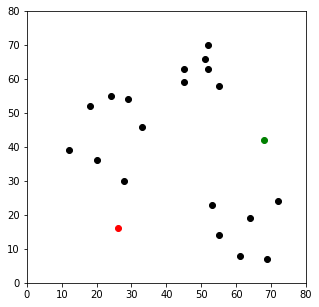

    x   y  distance_from_1  distance_from_2  closest color
0  12  39        26.925824        56.080300        1     r
1  20  36        20.880613        48.373546        1     r
2  28  30        14.142136        41.761226        1     r
3  18  52        36.878178        50.990195        1     r
4  29  54        38.118237        40.804412        1     r


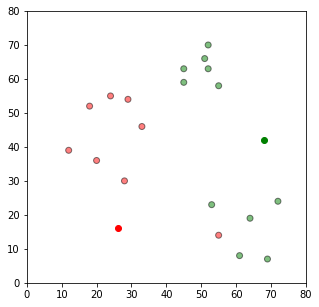

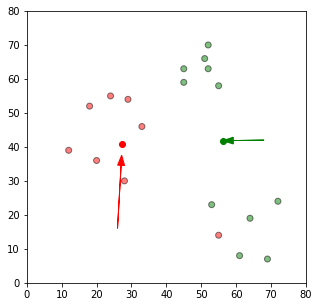

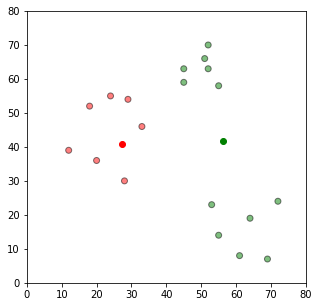

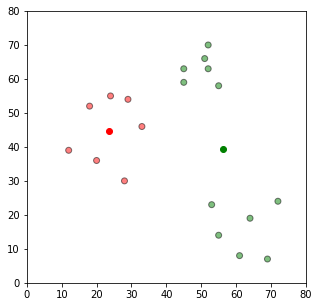

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame({'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72], 'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]})

np.random.seed(200)
k = 2

# centroids[i] = [x, y]

centroids = {
    i+1: [np.random.randint(0, 80), np.random.randint(0, 80)]
    for i in range(k)
}

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}

for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])

plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )

    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
print(df.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

centroids = update(centroids)

fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)

for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()
df = assignment(df, centroids)

# Plot results

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')

for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

#### Question 4
Consider the dataset given in the following link
<br/><br/>
https://drive.google.com/open?id=1tYTaiqpQUA7t0B65I6lOQJwZZX8DpA-E
<br/><br/>
The dataset contain information related to credit card fraud detection. The last
column in the dataset displays whether a transaction is fraudulent or not (0 – Not
Fraudulent, 1 – Fraudulent). Implement Naïve Bayes and Adaboost technique on 
the dataset and assess the performance of each model. The implementation result
must consider the following information while implementing each of these techniques
<br/>
<br/>
a. Use 10-fold cross validation technique
<br/>
b. Prepare the confusion matrix, find out the precision and recall value and useF-measure to access the performance.
<br/>
c. Compare the error rate and performance of each techniques using MSE,
MMRE, prediction accuracy as the measures.
<br/>
d. Prepare ROC and AUC curve based on the result obtained.

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

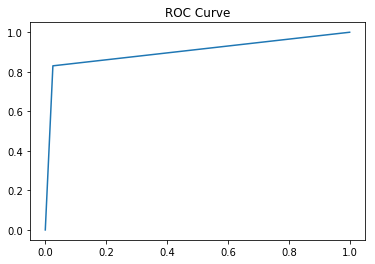

AUC: 0.9025658014432181
Fold 1 Accuracy: 97.29985955056179%
Fold 2 Accuracy: 97.47893258426966%
Fold 3 Accuracy: 97.38061797752809%
Fold 4 Accuracy: 97.36657303370787%
Fold 5 Accuracy: 97.6369382022472%
Fold 6 Accuracy: 97.30337078651685%
Fold 7 Accuracy: 97.5561797752809%
Fold 8 Accuracy: 97.38061797752809%
Fold 9 Accuracy: 97.1804775280899%
Fold 10 Accuracy: 97.4122191011236%
The total prediction after 10 folds of validation is 97.3995786516854


In [13]:
import pandas
import random
import math
from random import seed
from random import randrange
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics



def loadCsv(filename):
    file = pandas.read_csv(filename)
    file = file.astype('float')
    print(file.head())
    return file.iloc[:,1:]

def splitDataset(dataset, splitRatio):
    list_dataset = dataset.values.tolist()
    trainSize = int(len(dataset) * splitRatio)
    trainSet = []
    copy = list_dataset.copy()
    while len(trainSet) < trainSize:
        index = random.randrange(len(copy))
        trainSet.append(copy.pop(index))
    return trainSet, copy

def separateByClass(dataset):
    separated = {}
    for i in range(len(dataset)):
        vector = dataset[i]
        if (vector[-1] not in separated):
            separated[vector[-1]] = []
        separated[vector[-1]].append(vector)
    return separated

def mean(numbers):
    return sum(numbers)/float(len(numbers))

def stdev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
    return math.sqrt(variance)

def summarize(dataset):
    summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
    del summaries[-1]
    return summaries

def summarizeByClass(dataset):
    separated = separateByClass(dataset)
    summaries = {}
    for classValue, instances in separated.items():
        summaries[classValue] = summarize(instances)
    return summaries

def calculateProbability(x, mean, stdev):
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent

def calculateClassProbabilities(summaries, inputVector):
    probabilities = {}
    for classValue, classSummaries in summaries.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, stdev = classSummaries[i]
            x = inputVector[i]
            probabilities[classValue] *= calculateProbability(x, mean, stdev)
    return probabilities
            
def predict(summaries, inputVector):
    probabilities = calculateClassProbabilities(summaries, inputVector)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel

def getPredictions(summaries, testSet):
    predictions = []
    for i in range(len(testSet)):
        result = predict(summaries, testSet[i])
        predictions.append(result)
    return predictions

def getAccuracy(testSet, predictions):
    correct = 0
    for i in range(len(testSet)):
        if testSet[i][-1] == predictions[i]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0


def cross_validation_split(dataset, folds):
    dataset_split = list()
    dataset_copy = dataset.values.tolist()
    fold_size = int(len(dataset) / folds)
    for i in range(folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        
        dataset_split.append(fold)
    return dataset_split

def calc_cross_val_score(dataset_split):
    testSet = []
    acc = []
    for i in range(len(dataset_split)):
        testSet = dataset_split[i]
        trainingSet = []
        for j in range(10):
            if (i ==j):
                continue
            else:
                trainingSet+= dataset_split[j]

        summaries = summarizeByClass(trainingSet)
        predictions = getPredictions(summaries, testSet)
        accuracy = getAccuracy(testSet, predictions)
        print('Fold {} Accuracy: {}%'.format(str(i+1),accuracy))
        acc.append(accuracy)

    print("The total prediction after 10 folds of validation is {}".format(str(mean(acc))))

def create_confusion_matrix(predictions,labels):
    tn = 0
    tp = 0
    fp = 0
    fn = 0
    for i in range(len(labels)):
        if labels[i][-1] == predictions[i]:
            if labels[i][-1] == 1:
                tp+=1
            else:
                tn+=1
        else:
            if labels[i][-1] == 0 and predictions[i] == 1:
                fp+=1
            else:
                fn+=1
    print('''The confusion matrix is:

			| Class 1 |  Class2 	|

			| Predicted | 	Predicted |
			_______________________

	Class1		|  TP	|	FN	|

	Actual		|  {}	|	{}	| 
			________________________

	Class2		|  FP 	|	TN	|

	Actual		|  {}	|{} 	|

			'''.format(tp,fn,fp,tn))
    cal_prec_recall(tp,fp,tn,fn)
    plot_roc_auc(predictions,labels)


def	cal_prec_recall(tp,fp,tn,fn):

    prec = tp/(fp+tp)
    recall = tp/(tp+fn)
    f1 = (2*recall*prec)/(recall+prec)
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    print("""The precision and recall of the data set are:

                Accuracy : {}
                Precision: {}
                Recall: {}
                F1 Score: {}""".format(accuracy,prec,recall,f1))

def plot_roc_auc(pred,test):
    
    fpr, tpr, thresholds = metrics.roc_curve(np.array(test)[:,-1], np.array(pred), pos_label=1)

    plt.plot(fpr,tpr)
    plt.title("ROC Curve")
    plt.show() 

    auc = np.trapz(tpr,fpr)
    print('AUC:', auc)



def main():
    filename = 'creditcard.csv'
    splitRatio = 0.60
    dataset = loadCsv(filename)
    print("######################## Naive Bayes #######################################")
    trainingSet, testSet = splitDataset(dataset, splitRatio)
    print("Split {} rows into train={} and test={} rows".format(len(dataset), len(trainingSet), len(testSet)))
    summaries = summarizeByClass(trainingSet)
    predictions = getPredictions(summaries, testSet)
    create_confusion_matrix(predictions,testSet)

    split_dataset = cross_validation_split(dataset,10)
    calc_cross_val_score(split_dataset)


if __name__ == "__main__":
    seed(1)
    main()